<font size="10" color = "red"> <center> <h1>Jorge Cardona</h1> </center> </font>

<font size="5"> <center> <h1>Imagen tomada de https://www.cs.purdue.edu/homes/dgleich/cs514-2016/julia/tmp.gif?0.5108956892188807%3E</h1> </center> </font>

![Alt Text](https://www.cs.purdue.edu/homes/dgleich/cs514-2016/julia/tmp.gif?0.5108956892188807%3E)

In [1]:
# instalar estas extensiones para que se pueda usar variables dentro del markdown
# es mejor instalar estos paquetes usando la terminal, ya que a veces no instalan
# en ocasiones es necesario crear un nuevo notebook para que funcione
#pip install jupyter_contrib_nbextensions
#jupyter contrib nbextension install --user
#jupyter nbextension enable python-markdown/main

In [2]:
# configura el tamano de cada celda al 100% de la pantalla
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# libreria que reune todas las características de un sistema de álgebra computacional 
# https://docs.sympy.org/0.7.2/tutorial.html
import sympy

#importa el valor infinito
from sympy import oo as infinito

# importa la libreria de simbolos, para interpretar las letras como variables en una ecuacion
from sympy import symbols as sb

#Declaramos las letras que se pueden usar para derivar en la funcion
w,x,z = sb('w x z')

# guardo el valor infinito en lavariable z
z = infinito

#Utilizamos el método init_printing, para que muestre los resultados como ecuaciones y no como operaciones matematicas
sympy.init_printing(use_unicode=True)

In [4]:
# Nombre del método que se va a realizar
metodo = "Método de la Secante"

# declara la ecuacion que será la base del ejercicio
y_original = (2*x**5) - (3*x**4) + (4*x**3) - (5*x**2) + (6*x) + 7 
y = y_original

# listas donde se van a guardar los valores de la grafica
m = []
n = []

# convierte la ecuacion a notacion latex, para mostrar en el gráfico
ecuacion_original = "${" + str(y_original).replace("**","^").replace("*","") + "}$"

<font size="10"> <center> <h1>{{metodo}}</h1> </center> </font>
<font size="10">$$x_{i+1} = x_{i} - \frac{f(x_{i}) \times (x_{i} - x_{i-1})}{f(x_{i})-f(x_{i-1})}$$</font>
<font size="5"> <center> <h1>Función que se va a evaluar</h1> </center> </font>


<font size="10"><center> $y = $ {{ecuacion_original}}</center></font>

<font size="5"> <center> <h1>Función en notación matemática</h1> </center> </font>
<font size="10"><center> $f(x) = $ {{ecuacion_original}}</center></font>
<font size="5"> <center> <h1>Función igualada a cero, para encontrar su aproximación</h1> </center> </font>
<font size="10"><center> $f(x) = 0 $</center></font>

In [5]:
# comienza a iterar en el rango que se quiere gráficar, cálcula la función para cada valor
# guarda los valores de la funcion evaluada entre el rango
def definir_valores_grafica(k,l,y):
    while (k > l):

        # guarda los valores que se van a gráfica en el eje x
        m.append(round(k,2))
        # guarda los valores que se van a gráfica en el eje y
        n.append(round(y.subs(x,k),2))
        # decremento de la variable que controla el loop, para garantizar que termine
        k -= 0.1
    # devuelve el resultado obtenido
    return m,n

In [6]:
def genera_valor_inicio(rango,divisiones_promedio):
    
    # asigna el numero de veces que se va a dividir la diferencia entre cero y valor del limite superior
    if(rango <= 100):
        divisiones_promedio *= 2
    elif(rango <= 1000):
        divisiones_promedio *= 20
    elif(rango <= 10000):
        divisiones_promedio *= 200
    elif(rango <= 100000):
        divisiones_promedio *= 2000
    elif(rango <= 1000000):
        divisiones_promedio *= 20000         
    else:
        divisiones_promedio *= 200000  
        
    return rango / divisiones_promedio

In [8]:
def valor_inicio(conjunto_prueba,y1,contador_inferior,contador_superior,rango):
    
    for i in range(len(conjunto_prueba)):

        #calcula el valor de la funcion y lo asigna a la variable
        calculo_funcion = y.subs(x,conjunto_prueba[i])

        # si el calculo de la funcion es cero, ya encontro el valor para resolver la ecuacion
        if(calculo_funcion == 0):
            #asigna el valor donde hace que la ecuacion sea cero
            rango = calculo_funcion
            #finaliza el ciclo, porque ya encontro el valor que satisface la ecuacion
            break
        else:
            # comienza a crear una lista con los valores calculados de la funcion
            valores.append(calculo_funcion)

            # la funcion calculada tiene valores negativos y va a dar el limite inferior del rango
            if(calculo_funcion < 0):

                # verifica que no exista un valor asignado anteriormente como limite inferior
                if(contador_inferior < 1):
                    # asigna el valor del limite inferior del rango
                    rango[0] = calculo_funcion

                    #asegura de que no se vuelva a reescribir el valor
                    contador_inferior += 1

                # verifica que el valor actual sea mayor que el valor anterior, y el valor actual sea mayor al valor del rango en la posicion cero
                # y si es asi, actualiza el valor como un nuevo limite inferior
                elif((valores[i] > valores[i -1]) and (valores[i] > rango[0])):

                    # asigna el valor del limite inferior del rango
                    rango[0] = calculo_funcion

            # la funcion calculada en ese valor tiene valor positivo  
            else:
                # verifica que no exista un valor asignado anteriormente como limite inferior
                if(contador_superior < 1):
                    # asigna el valor del limite inferior del rango
                    rango[1] = calculo_funcion

                    #asegura de que no se vuelva a reescribir el valor
                    contador_superior += 1

                # verifica que el valor actual sea menor que el valor anterior, y el valor actual sea menor al valor del rango en la posicion uno
                # y si es asi, actualiza el valor como un nuevo limite superior
                elif((valores[i] < valores[i -1]) and (valores[i] < rango[0])):

                    # asigna el valor del limite superior del rango
                    rango[1] = calculo_funcion 
                
    # verifica si la lista tenga tamano uno
    # si es asi, ya tiene el valor para resolver la ecuacion
    if(len(rango) == 1):
        # asigna el valor que resuleve la ecuacion
        x0 = rango
    # realiza un promedio entre los valores del rango encontrado y se elige como punto de partida para el inicio de la aproximacion
    else:
        # el rango no tenia numeros negativos
        if(rango[0] == 0):
            x0 = rango[1] / divisiones_promedio
            x1 = rango[1]

        # el rango no tenia valores positivos
        elif(rango[1] == 0):
            x0 = rango[0]
            x1 = rango[0] / divisiones_promedio
            
            
        elif(rango[0] == float('Inf')):
            x0 = genera_valor_inicio(rango[1],divisiones_promedio)
            x1 = rango[1]
                        
        elif(rango[1] == float('-Inf')):
            x0 = rango[0]
            x0 = genera_valor_inicio(rango[0],divisiones_promedio)

        # si el valor del rango[0] es menor que el valor del rango[1]   
        elif( abs(0 - rango[0]) < abs(0 - rango[1]) ):

            # saco la raiz cuadrada del primer valor y la raiz cubica del segundo valor
            # saco el promedio de los valores y los asigno a x0, con 4 cifras significativas
            x0 = round(-abs(rango[0])**(1/raiz_valor_menor),4)
            x1 = round(abs(rango[1])**(1/raiz_valor_mayor),4)

        elif( abs(0 - rango[1]) < abs(0 - rango[0]) ):
            # saco la raiz cuadrada del segundo valor y la raiz cubica del primer valor
            # saco el promedio de los valores y los asigno a x0, con 4 cifras significativas
            x0 = round(abs(rango[0])**(1/raiz_valor_mayor),4)
            x1 = round(abs(rango[1])**(1/raiz_valor_menor),4)

        else:
            x0 = 0

In [9]:
def calculo_aproximacion(x0,x1,y):

    # inicia el bucle de comparacacion para hallar el valor que satisface la aproximacion deseada de la funcion
    # hago la comparacion dentre los valores de x0 y x1, porque la aproximacion puede no ser tan sensible a la esperada
    # y quedaria en un bucle infinito, pero x0 y x1, deben ser diferentes, cuando se igualan los valores, la aproximacion termina
    while (x0 != x1):  

        # guarda las coordenadas que se van a usar en la grafica y ver como varia las aproximaciones
        coordenadas_x.append(x0)
        coordenadas_y.append(x1)

        #calcula las funciones con el valor de la aproximacion
        z0 = y.subs(x,x0)
        z1 = y.subs(x,x1)

        # define la funcion del metodo newton raphson
        #almacena el valor actual de x1, que sera el nuevo valor de x0 en la proxima iteracion
        x2 = x1
        # calcula el nuevo valor de x1
        x1 = x1 - (z1*(x1 - x0)) / (z1 - z0)
        # toma el valor de x1, antes de ser recalculado
        x0 = x2

    # calcula w, verificando que la aproximacion satisfaga la funcion calculada
    w = y.subs(x,x0)
    
    return x0,w

In [19]:
import numpy as np

# valor del rango donde se evaluaran los valores de la ecuacion
limite   = 10
# valor que incrementa entre cada numero generado para evaluar la ecuacion
intervalo = 0.1

# variable que contiene el intervalo donde estan los valores que permiten definir el valor que aproximar la ecuacion a cero
# despues seran reescritos para tener un intervalo mas cercano de inicio
# otra manera de declarar el valor infinito
rango = [-z,z]

# variable que contendra los valores con los cuales se eveluara la ecuacion
conjunto_prueba  = []

#estructura repetitiva tipo for, que crea una lista de valores para evaluar la ecuacion
for i in np.arange(-limite, limite, intervalo):
    conjunto_prueba.append(round(i,1))           
    
# variable que contendra los valores de la ecuacion evaluada
valores = []

# coordenadas para graficar y ver como se comporta la aproximacion
coordenadas_x = []
coordenadas_y = []

# variable de control para asegurar el primer valor del intervalo inferior, superior 
contador_inferior = 0
contador_superior = 0

# variable utilizada como sensibilidad, cuando no existen valores positivos o negativos en el rango
# es el numero de veces en que quiero dividir el valor entre cero y el valor positivo o negativo
# para iniciar como valor base para la aproximacion del metodo
divisiones_promedio = 10

# define la cantidad de ceros con que se quiere con precision la aproximacion
sensibilidad_ceros  = 10

# valores asignados para las potencias de las raices que se quieren calcular
# para sacar el promedio de entre los valores del intervalo, y usarlo como punto de inicio para la aproximacion
raiz_valor_menor = 2
raiz_valor_mayor = 3

In [20]:
valor_inicio(conjunto_prueba,y,contador_inferior,contador_superior,rango)

In [24]:
# calcula el valor con que se va a iniciar la evaluacion del metodo
x0 = rango[0]
x1 = rango[1]

In [25]:
# guarda la informacion con que se soluciono la ecuacion
resultado = calculo_aproximacion(x0,x1,y)
resultado

In [26]:
# define el intervalo en que se va a evaluar la funci+on para construir la gráfica
# utilizo el operador ternario para quedar con el numero que es mayor en valor absoluto
k = abs(rango[0]) if (abs(rango[0]) > abs(rango[1])) else abs(rango[1])
l = -k

puntos_grafica = definir_valores_grafica(k,l,y)

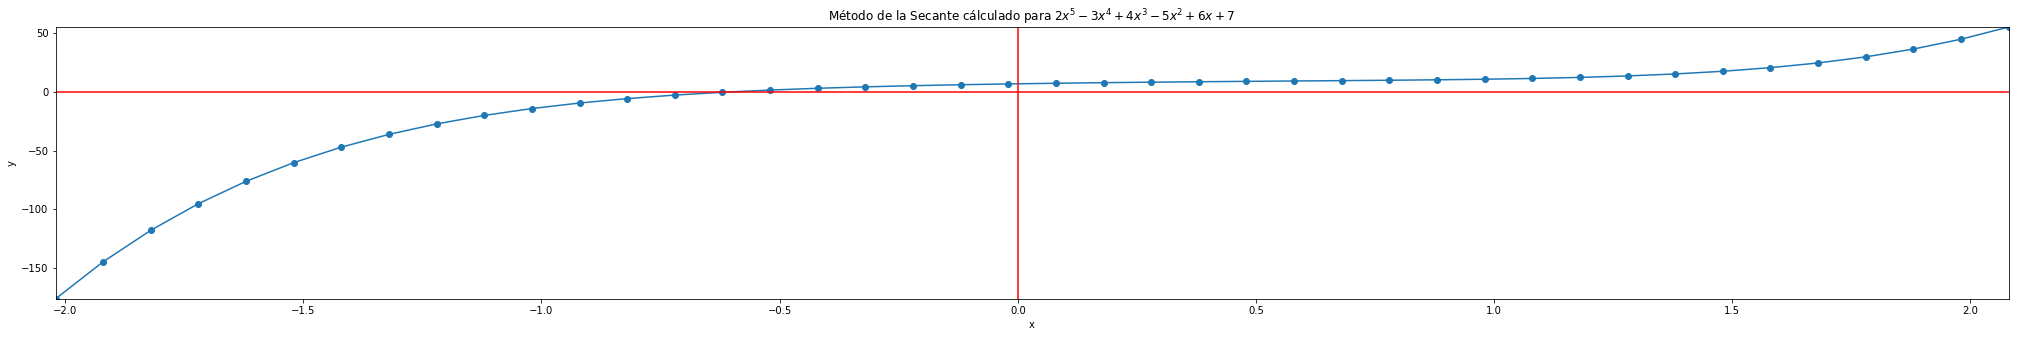

In [28]:
# importar el módulo pyplot
import matplotlib.pyplot as plt

# define el tamaño de la figura
plt.figure(figsize=(35,5))
# almacena los valores a mostrar en la figura
# pinta los puntos con el simbolo asignado en el marker
plt.plot(m,n, marker ="o")
# define la leyendad del eje x
plt.xlabel('x')
# define la leyendad del eje y
plt.ylabel('y')
# define el nombre del gráfico
plt.title(metodo + " cálculado para " + ecuacion_original)
# muestra las lineas del eje X y el eje Y
plt.axhline(y=0, color='red')
plt.axvline(x=0, color='red')

# define la escala de cada eje del gráfico
plt.xlim(min(m),max(m))
plt.ylim(min(n),max(n))

# muestra la figura
plt.show()